In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

МИРЭК | 4 модуль

*Автор: Татьяна Рогович*

# Основы программирования в Python
## Домашнее задание 1

## Библиотека pandas

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/2020_MIREC_PfDA/master/%40HW/1_HW/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1. (0.5 балла)__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но мы должны видеть как вы это делали). 

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [4]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2. (1 балл)__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [5]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean())
data['Age'] = data['Age'].fillna(data['Age'].median())

__Задание 3. (0.25 балла)__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [6]:
print('Минимальные значения:')
print(data.min(), end='\n\n')

print('Максимальные значения:')
print(data.max(), end='\n\n')

print('Средние значения:')
print(data.mean(), end='\n\n')

print('Дисперсия:')
print(data.std(), end='\n\n')

print('Квантили:')
print(data.quantile())

Минимальные значения:
Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Class                        0.000
dtype: float64

Максимальные значения:
Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Class                         1.00
dtype: float64

Средние значения:
Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Ag

__Задание 4. (0.25 балла)__

У скольких женщин старше 50 лет обнаружен диабет?

In [7]:
len(data[data.Age > 50]) 

81

__Задание 5. (0.25 балла)__

Найдите трех женщин с наибольшими числом беременностей.

In [8]:
data.sort_values(by=['Pregnancies'], ascending=False)[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6. (0.25 балла)__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [9]:
len(data[(data.Pregnancies >= 3) & (data.Age < 30)])

117

__Задание 7. (1 балл)__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [10]:
len(data[(data.BloodPressure >= 80) & (data.BloodPressure <= 89)])/len(data) * 100

18.880208333333336

__Задание 8. (1 балл)__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [11]:
len(data[(data.BMI >= 30) & (data.BloodPressure > data.BloodPressure.median())])

274

__Задание 9. (1 балл)__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [12]:
data[data.Class == 0].Glucose.mean() > data[data.Class == 1].Glucose.mean()

False

In [13]:
data[data.Class == 0].BloodPressure.mean() > data[data.Class == 1].BloodPressure.mean()

False

In [14]:
data[data.Class == 0].Insulin.mean() > data[data.Class == 1].Insulin.mean()

False

__Задание 10. (0.5 балла)__

Постройте круговую диаграмму для признака __Class__.

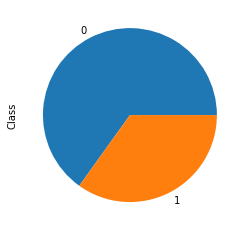

In [15]:
data['Class'].value_counts().plot(kind='pie')

__Задание 11. (0.5 балла)__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

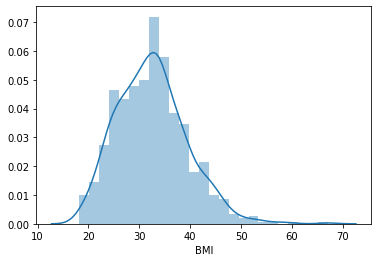

In [16]:
sns.distplot(data['BMI'])

Распределение близко к нормальному, с математическим ожиданием равным 30 

__Задание 12. (1 балл)__

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

[Text(0, 0.5, 'Percentage')]

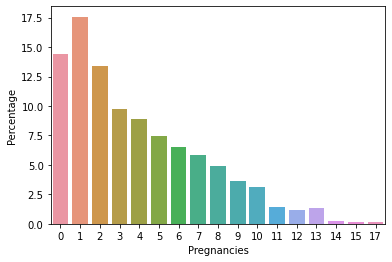

In [18]:
ax = sns.barplot(x="Pregnancies", y="Class", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel='Percentage')

__Задание 13. (0.5 балла)__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [19]:
data['wasPregnant'] = data.Pregnancies.apply(lambda x: 1 if x > 0 else 0)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,0,1
2,8,183.0,64.0,NaN,155.548223,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0,1
764,2,122.0,70.0,27.0,155.548223,36.8,0.340,27,0,1
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0,1
766,1,126.0,60.0,NaN,155.548223,30.1,0.349,47,1,1


__Задание 14. (0.5 балла)__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [20]:
p = data[(data.wasPregnant == 0) & (data.Class == 1)].index.size / data[data.wasPregnant == 0].size * 100
print('Процент среди женщин, которые не были беременны: ', str(p), '%')
p = data[(data.wasPregnant == 1) & (data.Class == 1)].index.size / data[data.wasPregnant == 1].size * 100
print('Процент среди женщин, которые были беременны: ', str(p), '%')

Процент среди женщин, которые не были беременны:  3.423423423423423 %
Процент среди женщин, которые были беременны:  3.50076103500761 %


__Задание 15. (1 балл)__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [21]:
def f(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
data['bodyType'] = data.BMI.apply(f)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,NaN,155.548223,23.3,0.672,32,1,1,Normal
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,0,Obesity
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0,1,Obesity
764,2,122.0,70.0,27.0,155.548223,36.8,0.340,27,0,1,Obesity
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0,1,Overweight
766,1,126.0,60.0,NaN,155.548223,30.1,0.349,47,1,1,Obesity


__Задание 16. (0.5 балла)__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [22]:
isHealthy = (data['bodyType'] == 'Normal') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)
len(data[isHealthy & data['Class'] == 1])  / len(data[isHealthy]) * 100

10.0